Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
mat_design = PolynomialFeatures(1).fit_transform(X)

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg

w_1 = linalg.inv(mat_design.T @ mat_design) @ mat_design.T @ y
print(f'Weights calculated with inverses: {w_1}')

w_2 = linalg.pinv(mat_design) @ y 
print(f'Weights calculated with psudeo-inverse: {w_2}')

Weights calculated with inverses: [2.2        0.45714286]
Weights calculated with psudeo-inverse: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
y_predicted = mat_design @ w_1.T
print(f'Weights: {w_1}')
print(f'Predicted values: {y_predicted}')

error = (1/2) * np.sum((y - y_predicted) ** 2)
print(f'E(h|D) (with coef 1/2): {error}')
print(f'mean_squared_error from sklearn.metrics (with coef 1/4): {mean_squared_error(y_predicted, y)}')

Weights: [2.2        0.45714286]
Predicted values: [2.2        2.65714286 3.11428571 4.02857143]
E(h|D) (with coef 1/2): 4.085714285714286
mean_squared_error from sklearn.metrics (with coef 1/4): 2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
try:
    w = linalg.inv(mat_design) @ y
except np.linalg.LinAlgError as e:
    print(f'Cannot invert matrix mat_design. {e}.')
    print(f'Dimensions of design matrix: {mat_design.shape}')

Cannot invert matrix mat_design. Last 2 dimensions of the array must be square.
Dimensions of design matrix: (4, 2)


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(mat_design, y)

print(f'w0: {linear_regression.coef_}')
print(f'weights (without w0): {linear_regression.intercept_}')
print(f'Predicted values: {linear_regression.predict(mat_design)}')

w0: [0.         0.45714286]
weights (without w0): 2.2
Predicted values: [2.2        2.65714286 3.11428571 4.02857143]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return np.array([f(x) + normal(0, noise) for x in X])

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
def generate_function(x):
    return 5 + x - 2 * (x ** 2) - 5 * (x ** 3)

N = 50
lower_bound = -5
upper_bound = 5
X_generated = make_instances(lower_bound, upper_bound, N)
y_generated = make_labels(X_generated, generate_function, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

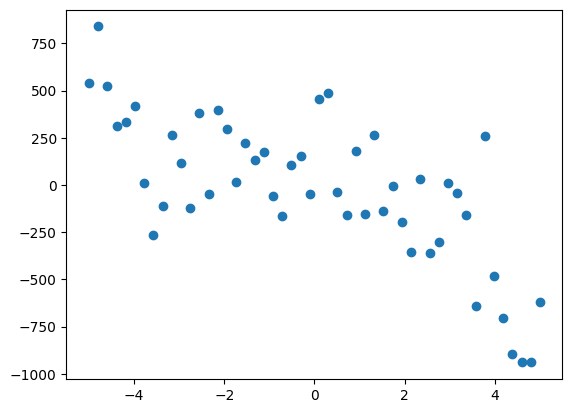

In [11]:
_ = plt.scatter(X_generated, y_generated)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

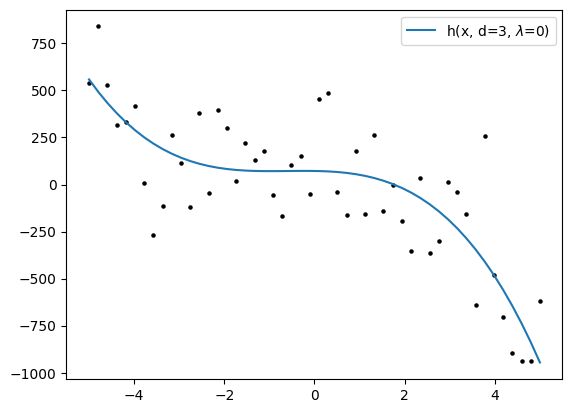

In [12]:
def polynomial_regression(d, X_train, y_train, X_test=None, y_test=None, plot=True, lam=0):
    mat_design = PolynomialFeatures(d).fit_transform(X_train)
    I = np.eye(len(mat_design[0]))
    I[0,0] = 0
    w = linalg.inv(mat_design.T @ mat_design + lam * I) @ mat_design.T @ y_train
    y_generated_pred = [w.T @ row for row in mat_design]

    if plot == True:
        plt.scatter(X_train, y_train, c='black', s=5)
        plt.plot(X_train, y_generated_pred, label=f'h(x, d={d}, $\lambda$={lam})')
        plt.legend(loc="upper right")

    train_error = (1/2) * np.sum((y_train - y_generated_pred) ** 2)
    test_error = None

    if X_test is not None and y_test is not None:
        mat_design = PolynomialFeatures(d).fit_transform(X_test)
        y_generated_pred = [w.T @ row for row in mat_design]
        test_error = (1/2) * np.sum((y_test - y_generated_pred) ** 2)

    return w, train_error, test_error

_ = polynomial_regression(3, X_generated, y_generated)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

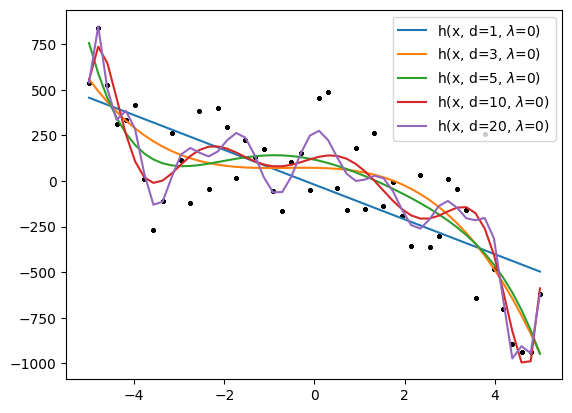

In [13]:
Ds = [1, 3, 5, 10, 20]
for d in Ds:
    polynomial_regression(d, X_generated, y_generated)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

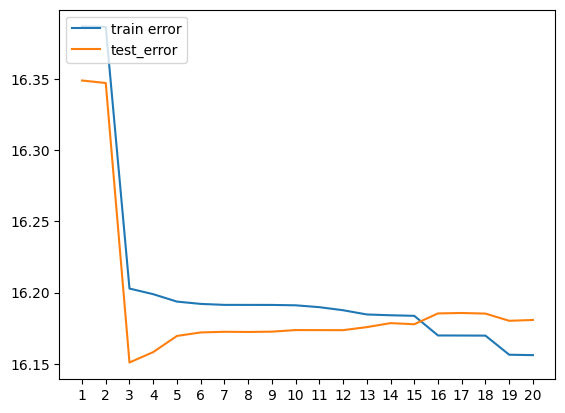

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_generated, y_generated, test_size=0.5)
train_errors = []
test_errors = []

for d in range(1, 21):
    weights, train_error, test_error = polynomial_regression(d, X_train, y_train, X_test, y_test, False)
    train_errors.append(np.log(train_error))
    test_errors.append(np.log(test_error))

plt.xticks(range(1, 21))
plt.plot(range(1, 21), train_errors, label='train error')
plt.plot(range(1, 21), test_errors, label='test_error')
_ = plt.legend(loc='upper left')

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

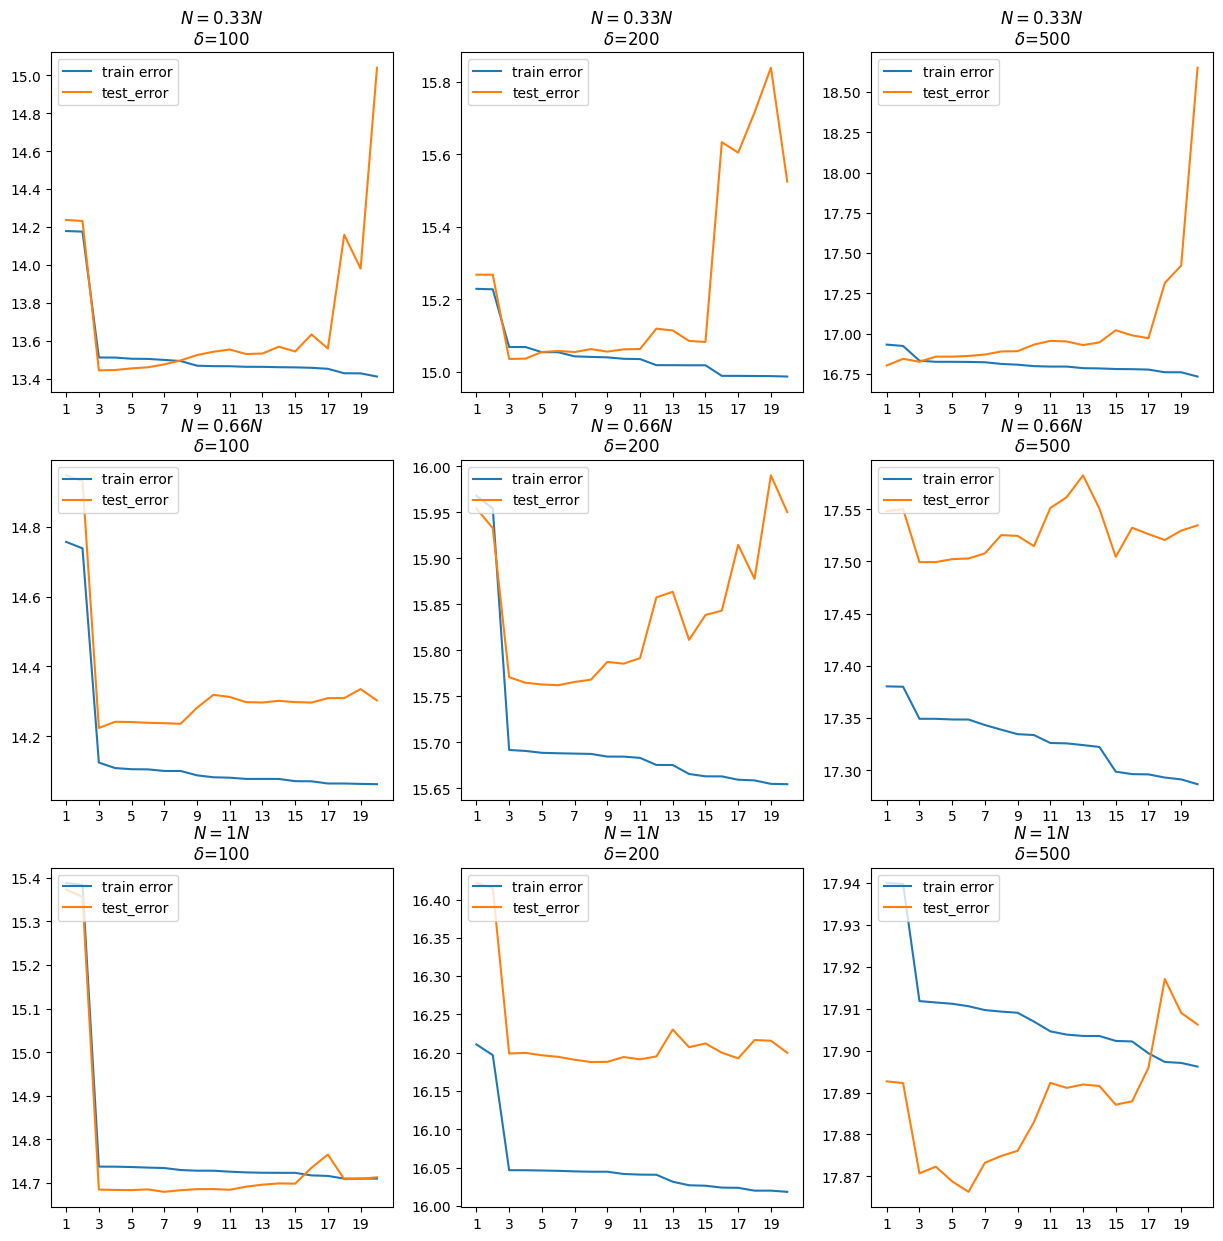

In [56]:
figure, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.setp(axes, xticks=range(1,21, 2))

X_generated = make_instances(-5, 5, 1000)
y_generated = make_labels(X_generated, generate_function, 200)
X_train, X_test, y_train, y_test = train_test_split(X_generated, y_generated, test_size=0.5)
for i, ratio in enumerate((0.33, 0.66, 1)):
    n_elements = int(len(X_train) * ratio)
    X_train_ratio = X_train[:n_elements]
    y_train_ratio = y_train[:n_elements]

    X_test_ratio = X_test[:n_elements]
    y_test_ratio = y_test[:n_elements]

    for j, noise in enumerate((100, 200, 500)):
        y_train_ratio = make_labels(X_train_ratio, generate_function, noise)
        y_test_ratio = make_labels(X_test_ratio, generate_function, noise)

        train_errors = []
        test_errors = []

        for d in range(1, 21):
            weights, train_error, test_error = polynomial_regression(d, X_train_ratio, y_train_ratio, X_test_ratio, y_test_ratio, False)
            train_errors.append(np.log(train_error))
            test_errors.append(np.log(test_error))

        axes[i, j].title.set_text(f'$N={ratio}N$\n$\delta$={noise}')
        axes[i, j].plot(range(1, 21), train_errors, label='train error')
        axes[i, j].plot(range(1, 21), test_errors, label='test_error')
        axes[i, j].legend(loc='upper left')

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [57]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
for lam in (0, 1, 10):
    weights, train_error, _ = polynomial_regression(3, X, y, lam=lam, plot=False)
    print(f'lamdba = {lam}\tweights = {weights}')

lamdba = 0	weights = [ 4.         -5.91666667  3.375      -0.45833333]
lamdba = 1	weights = [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lamdba = 10	weights = [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [58]:
from sklearn.linear_model import Ridge
X = np.array([[0],[1],[2],[4]])
mat_design = PolynomialFeatures(3).fit_transform(X)
y = np.array([4,1,2,5])
for lam in (0, 1, 10):
    ridge_regression = Ridge(alpha=lam).fit(mat_design, y)
    weights = ridge_regression.coef_
    weights[0] = ridge_regression.intercept_
    print(f'lamdba = {lam}\tweights: {weights}')

lamdba = 0	weights: [ 4.         -5.91666667  3.375      -0.45833333]
lamdba = 1	weights: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lamdba = 10	weights: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

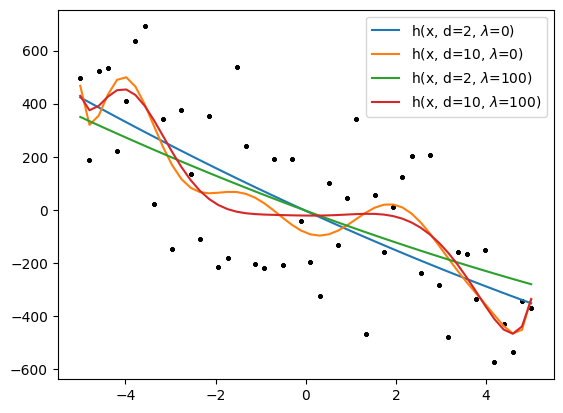

In [59]:
X_generated = make_instances(-5, 5, 50)
y_generated = make_labels(X_generated, generate_function, 200)
for lam in (0, 100):
    for d in (2, 10):
        weights, train_error, test_error = polynomial_regression(d, X_generated, y_generated, lam=lam, plot=True)

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


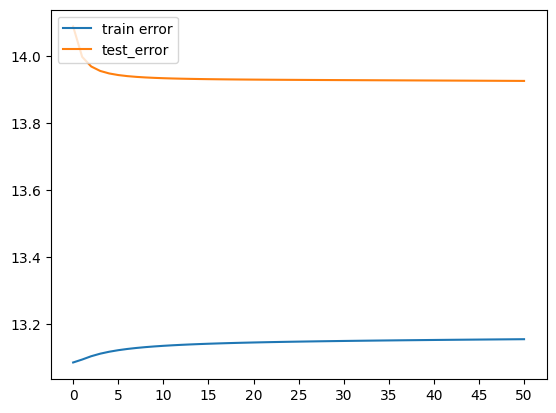

In [159]:
N = 50
lower_bound = -5
upper_bound = 5

X_generated = make_instances(lower_bound, upper_bound, N)
y_generated = make_labels(X_generated, generate_function, 200)
X_train, X_test, y_train, y_test = train_test_split(X_generated, y_generated, test_size=0.5)
train_errors = []
test_errors = []

for lam in range(0, 51):
    weights, train_error, test_error = polynomial_regression(10, X_train, y_train, X_test, y_test, lam=lam, plot=False)
    train_errors.append(np.log(train_error))
    test_errors.append(np.log(test_error))

plt.xticks(range(0, 51, 5))
plt.plot(range(0, 51), train_errors, label='train error')
plt.plot(range(0, 51), test_errors, label='test_error')
_ = plt.legend(loc='upper left')

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [160]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

Postotak tezina modela jednak nuli: 16.666666666666664


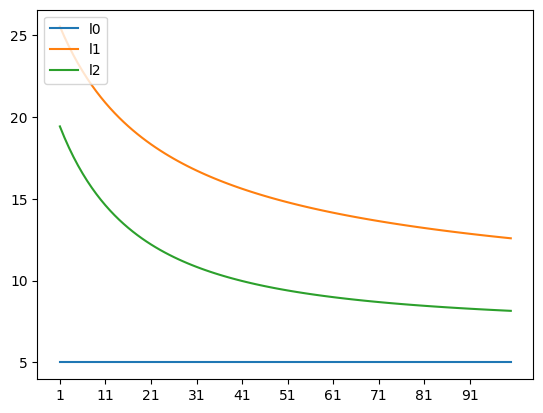

In [170]:
mat_design = PolynomialFeatures(5).fit_transform(X_generated)
l0_curve = []
l1_curve = []
l2_curve = []

for lam in range(1, 101):
    ridge_regression = Ridge(alpha=lam).fit(mat_design, y_generated)
    l0_curve.append(nonzeroes(ridge_regression.coef_[0]))
    l1_curve.append(linalg.norm(ridge_regression.coef_[0], ord=1))
    l2_curve.append(linalg.norm(ridge_regression.coef_[0]))

print(f'Postotak tezina modela jednak nuli: {(1 - l0_curve[-1] / len(ridge_regression.coef_[0])) * 100}')
plt.xticks(range(1, 101, 10))
plt.plot(range(1, 101), l0_curve, label='l0')
plt.plot(range(1, 101), l1_curve, label='l1')
plt.plot(range(1, 101), l2_curve, label='l2')
_ = plt.legend(loc='upper left')

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

Postotak tezina modela jednak nuli: 50.0


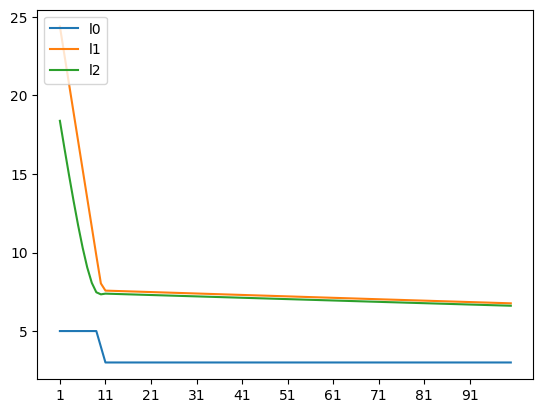

In [171]:
from sklearn.linear_model import Lasso
mat_design = PolynomialFeatures(5).fit_transform(X_generated)
l0_curve = []
l1_curve = []
l2_curve = []

for lam in range(1, 101):
    lasso_regression = Lasso(alpha=lam).fit(mat_design, y_generated)
    l0_curve.append(nonzeroes(lasso_regression.coef_))
    l1_curve.append(linalg.norm(lasso_regression.coef_, ord=1))
    l2_curve.append(linalg.norm(lasso_regression.coef_))

print(f'Postotak tezina modela jednak nuli: {(1 - l0_curve[-1] / len(ridge_regression.coef_[0])) * 100}')
plt.xticks(range(1, 101, 10))
plt.plot(range(1, 101), l0_curve, label='l0')
plt.plot(range(1, 101), l1_curve, label='l1')
plt.plot(range(1, 101), l2_curve, label='l2')
_ = plt.legend(loc='upper left')

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [174]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

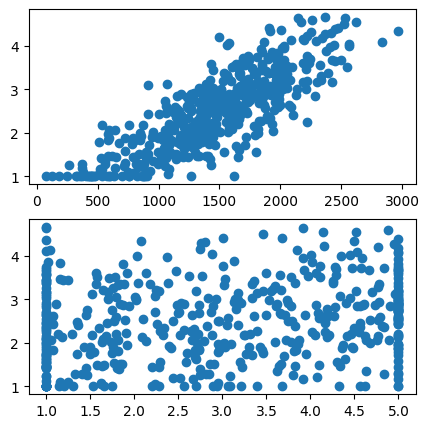

In [175]:
figure, axes = plt.subplots(2, 1, figsize=(5, 5))
axes[0].scatter(exam_score, grades_y)
_ = axes[1].scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [176]:
ridge_regression = Ridge(alpha=0.01).fit(grades_X, grades_y)
print(ridge_regression.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [200]:
from sklearn.preprocessing import StandardScaler
grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1, 1))

ridge_regression = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y)
print(ridge_regression.coef_)

[0.73954683 0.13741539]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [201]:
grades_X_fixed_colinear = [[row[0], row[1], row[-1]] for row in grades_X_fixed]
print(grades_X_fixed_colinear[-1])

[-0.019381255925473018, 1.2172971404751272, 1.2172971404751272]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [207]:
ridge_regression = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y)
print(ridge_regression.coef_)

[0.73954673 0.06870839 0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [205]:
weights = [[] for i in range(0, 6)]
for it in range(0, 10):
    grades_X_random, grades_y_random, _, _ = train_test_split(grades_X_fixed_colinear, grades_y, test_size=0.5)

    ridge_regression = Ridge(alpha=0.01).fit(grades_X_random, grades_y_random)
    weights[0].append(ridge_regression.intercept_[0])
    weights[1].append(ridge_regression.intercept_[1])
    weights[2].append(ridge_regression.intercept_[2])
    print(f'l=0.01 {ridge_regression.intercept_}')

    ridge_regression = Ridge(alpha=1000).fit(grades_X_random, grades_y_random)
    weights[3].append(ridge_regression.intercept_[0])
    weights[4].append(ridge_regression.intercept_[1])
    weights[5].append(ridge_regression.intercept_[2])
    print(f'l=1000 {ridge_regression.intercept_}')
    print()


print(f'stddev(w0_1) = {np.std(weights[0])}')
print(f'stddev(w1_1) = {np.std(weights[1])}')
print(f'stddev(w2_1) = {np.std(weights[2])}')
print()
print(f'stddev(w0_2) = {np.std(weights[3])}')
print(f'stddev(w1_2) = {np.std(weights[4])}')
print(f'stddev(w2_2) = {np.std(weights[5])}')

l=0.01 [ 0.03498097 -0.01615691 -0.01615691]
l=1000 [ 0.04112129 -0.01725457 -0.01725457]

l=0.01 [-0.07918391 -0.04496291 -0.04496291]
l=1000 [-0.08212119 -0.04425622 -0.04425622]

l=0.01 [-0.01056909 -0.01641512 -0.01641512]
l=1000 [-0.01094968 -0.01614962 -0.01614962]

l=0.01 [0.02992048 0.02491645 0.02491645]
l=1000 [0.02828798 0.02481441 0.02481441]

l=0.01 [0.0500859  0.00799456 0.00799456]
l=1000 [0.05892983 0.00416394 0.00416394]

l=0.01 [-0.05802299 -0.04676332 -0.04676332]
l=1000 [-0.05943158 -0.04339078 -0.04339078]

l=0.01 [0.05068578 0.01739171 0.01739171]
l=1000 [0.04973738 0.0201592  0.0201592 ]

l=0.01 [-0.06343104 -0.03749691 -0.03749691]
l=1000 [-0.06596372 -0.03621659 -0.03621659]

l=0.01 [-0.01079456  0.03724373  0.03724373]
l=1000 [-0.01112426  0.03721408  0.03721408]

l=0.01 [-0.07365773  0.06517925  0.06517925]
l=1000 [-0.06925351  0.0630222   0.0630222 ]

stddev(w0_1) = 0.04982053241439084
stddev(w1_1) = 0.035720318020581183
stddev(w2_1) = 0.035720318020581183



**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.